In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mplEasyAnimate import animation
from tqdm import tqdm
from scipy.special import comb
from scipy.special import factorial
from numba import jit

In [2]:
G = 6.6e-11

In [96]:
def rk4(f, y0, t, h, ID, pList):
    k1 = h*f(y0, t, ID, pList)
    k2 = h*f(y0+k1/2, t+(h/2), ID, pList)
    k3 = h*f(y0+k2/2, t+(h/2), ID,pList)
    k4 = h*f(y0+k3, t+h, ID, pList)
#     print('K1: ', k1)
#     print('Y1: ', y0+k1/2)
#     print('---------')
#     print('K2: ', k2)
#     print('Y2: ', y0+k2/2)
#     print('---------')
#     print('K3: ', k3)
#     print('Y3: ', y0+k3)
#     print('---------')
#     print('K4: ', k4)
#     print('============')
    if ID == 1:
        raise TypeError()
    return y0 + (k1/6)+(k2/3)+(k3/3)+(k4/6)

In [97]:
def nbody(I0, t, ID, pList):
    dydt = np.zeros(7)
    dydt[:3] = I0[3:6]
    m = I0[6]
    
    for i, particle in enumerate(pList):
        if ID != i:
            r = particle[:3] - I0[:3]
            rmag = np.sqrt(sum([x**2 for x in r]))
            if rmag > 0.5:
                rhat = r/rmag
                AMag = (G*particle[6])/((rmag)**2)
                dydt[3:6] += AMag*rhat
                if ID == 1:
                    print("Force From Model is: ", dydt)
                    print("Rmag is: ", rmag)
                    print("Rmag^2 is: ", rmag*rmag)
                    print('Mass is: ', particle[6])
                    print("G is: ", G)
                    print("Rhat is: ", rhat)
                    print("================")

    return dydt

In [98]:
def int_n_model(model, method, y0, h, t0=0, tf=1):
    ts = np.arange(t0, tf, h)
    ys = np.zeros(shape=(len(ts)+1, y0.shape[0], y0.shape[1]))
    ys[0] = y0
    for i, t in tqdm(enumerate(ts), total=len(ts)):
        for ID, particle in enumerate(ys[i]):
            ys[i+1][ID] = method(model, particle, t, h, ID, ys[i])
    return np.arange(t0, tf+h, h), ys

In [99]:
pos = np.array([[149.6e9, 0, 0], [0, 0, 0]])
vel = np.array([[0, 30000, 0], [0, 0, 0]])
mass = np.array([[6e24], [2e30]])
init = np.hstack((pos, vel, mass))

In [100]:
ts, ys = int_n_model(nbody, rk4, init, 86400, tf=3*np.pi*1e7)

  0%|          | 0/1091 [00:00<?, ?it/s]

Force From Model is:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.76942435e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Rmag is:  149600000000.0
Rmag^2 is:  2.238016e+22
Mass is:  6e+24
G is:  6.6e-11
Rhat is:  [1. 0. 0.]
Force From Model is:  [7.64391318e-04 0.00000000e+00 0.00000000e+00 1.76942435e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Rmag is:  149600000000.0
Rmag^2 is:  2.238016e+22
Mass is:  6e+24
G is:  6.6e-11
Rhat is:  [1. 0. 0.]
Force From Model is:  [7.64391318e-04 0.00000000e+00 0.00000000e+00 1.76942435e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Rmag is:  149599999966.9783
Rmag^2 is:  2.2380159990119906e+22
Mass is:  6e+24
G is:  6.6e-11
Rhat is:  [1. 0. 0.]
Force From Model is:  [1.52878264e-03 0.00000000e+00 0.00000000e+00 1.76942435e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Rmag is:  149599999933.9566
Rmag^2 is:  2.2380159980239816e+22
Mass is:  6e+24
G is:  6.6e-11
Rhat is:  [1. 0. 0.]


TypeError: 

In [95]:
ys.shape

(1092, 2, 7)

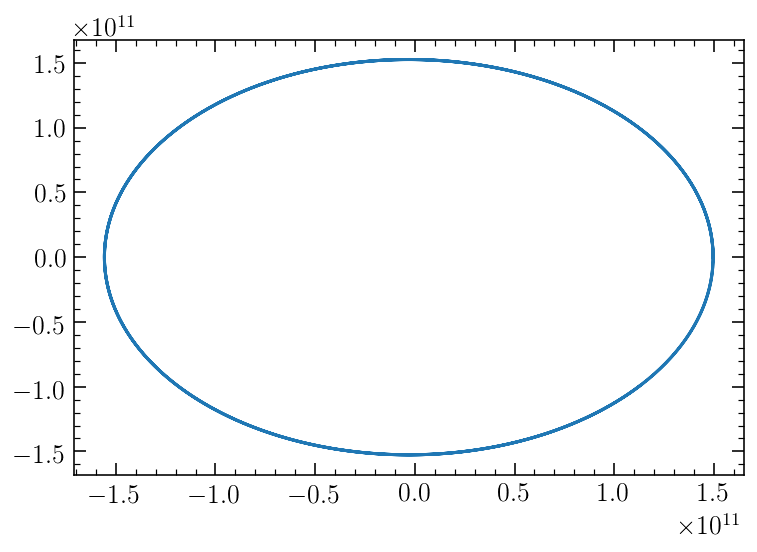

In [37]:
plt.plot(ys[:, 0, 0], ys[:, 0, 1])

In [101]:
(6.6e-11*6e+24)/2.23802e+22

1.769421184797276e-08